In [73]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlite3

In [74]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [75]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [76]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [77]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [78]:
# View all of the classes that automap found
Base.classes.keys()

    

['measurement', 'station']

In [79]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [80]:
# Create our session (link) from Python to the DB
session = Session(engine)
session


# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
from datetime import datetime
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = datetime.strptime(recent_date[0], '%Y-%m-%d').date()

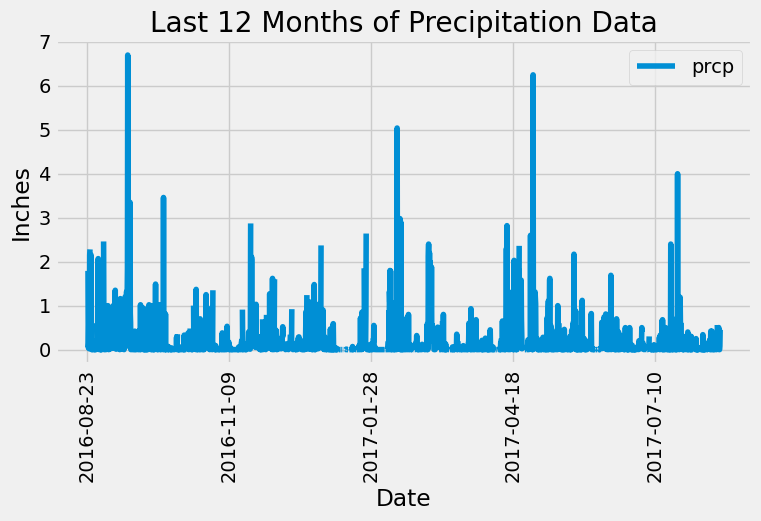

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set
monthprcp = recent_date - dt.timedelta(365)
monthprcp

#Perform a query to retrieve the data and precipitation scores
prcpresults = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= monthprcp).all()
prcpdf = pd.DataFrame(prcpresults)

# Sort the dataframe by date
prcpdf = prcpdf.sort_values('date')

# Save the query results as a Pandas DataFrame and set the index to the date column
prcpdf.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcpdf.plot(kind='line', y='prcp',figsize =(8,4))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 90)
plt.title('Last 12 Months of Precipitation Data')
plt.tight_layout
plt.show()





In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [84]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(Station.station)).first()
total_station


(9,)

In [85]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station , func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [86]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station_id = session.query(Measurement.station , func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_station[0][0]).all()
active_station_id


[('USC00519281', 85.0, 54.0, 71.66378066378067)]

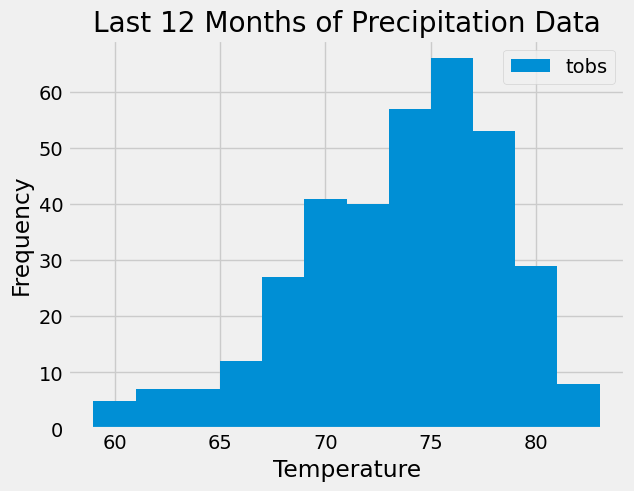

In [87]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observe_data = session.query(Measurement.tobs).filter(Measurement.station == active_station[0][0]).\
    filter(Measurement.date >= monthprcp).all()

prcptempdf = pd.DataFrame(temp_observe_data)

prcptempdf.tobs.plot(kind='hist', bins = 12)
plt.legend(["tobs"])
plt.xlabel('Temperature')
plt.title('Last 12 Months of Precipitation Data')
plt.tight_layout
plt.show()

# Close session

In [88]:
# Close Session
session.close()